# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
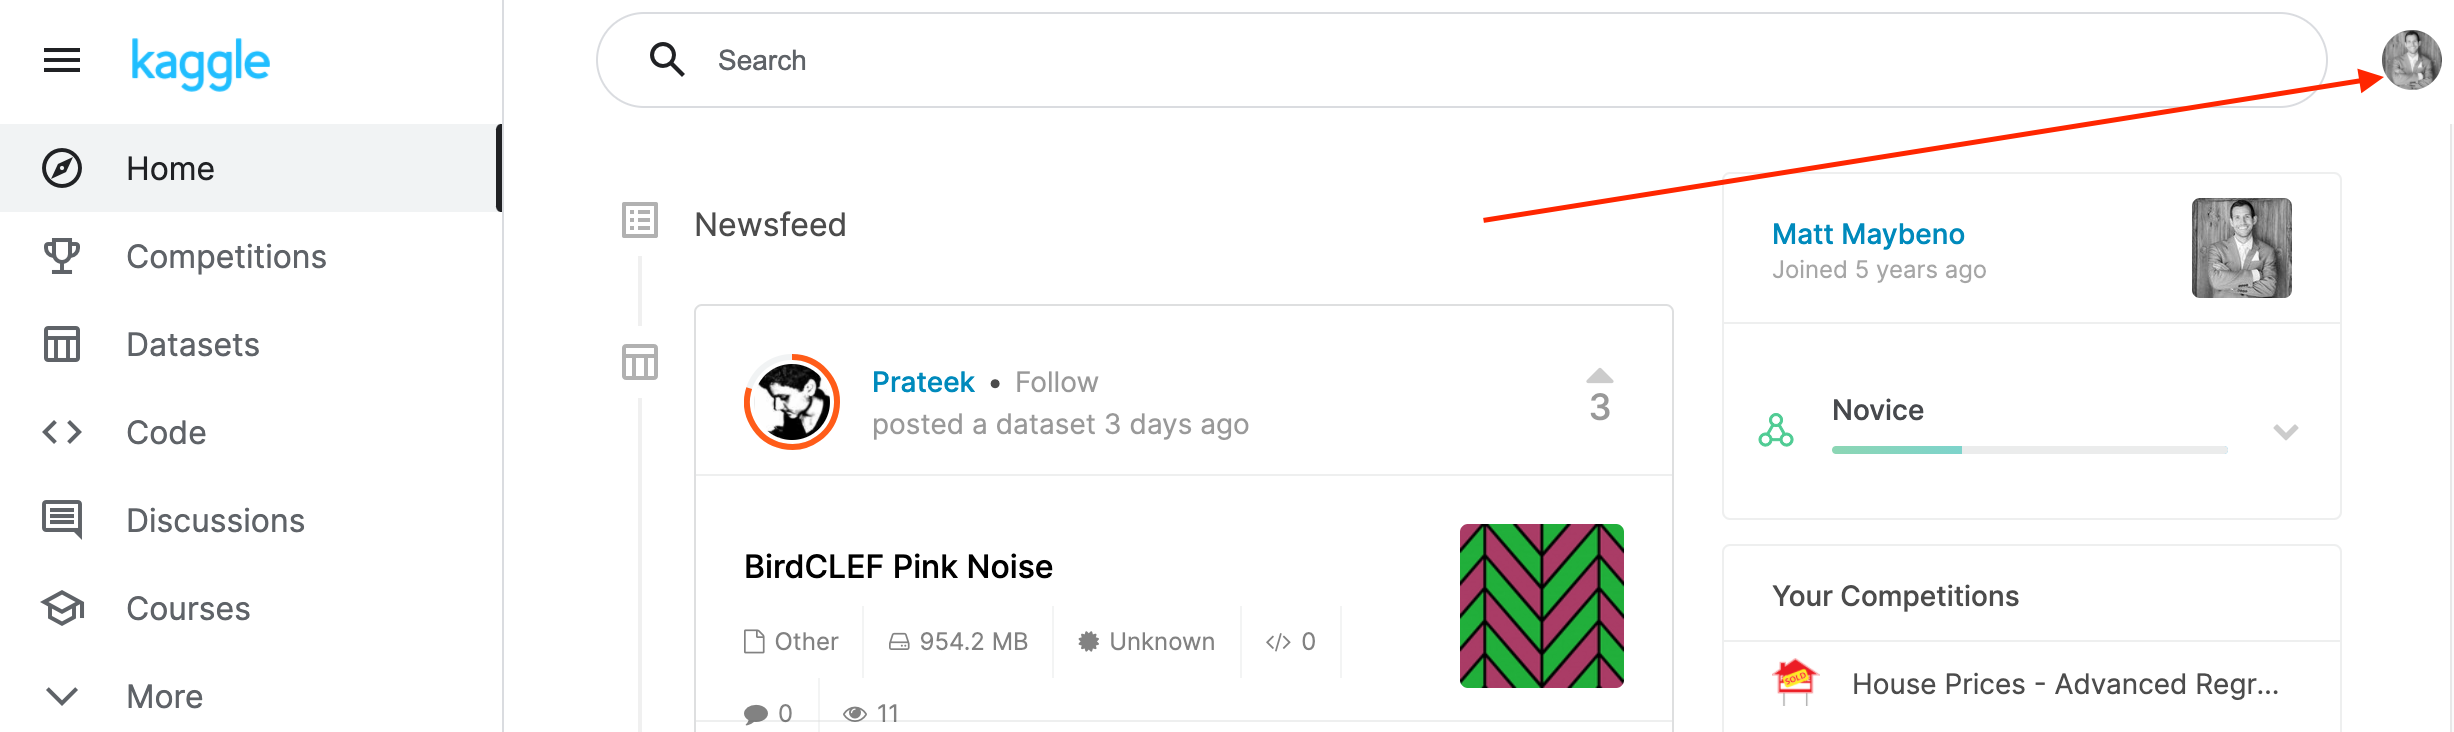
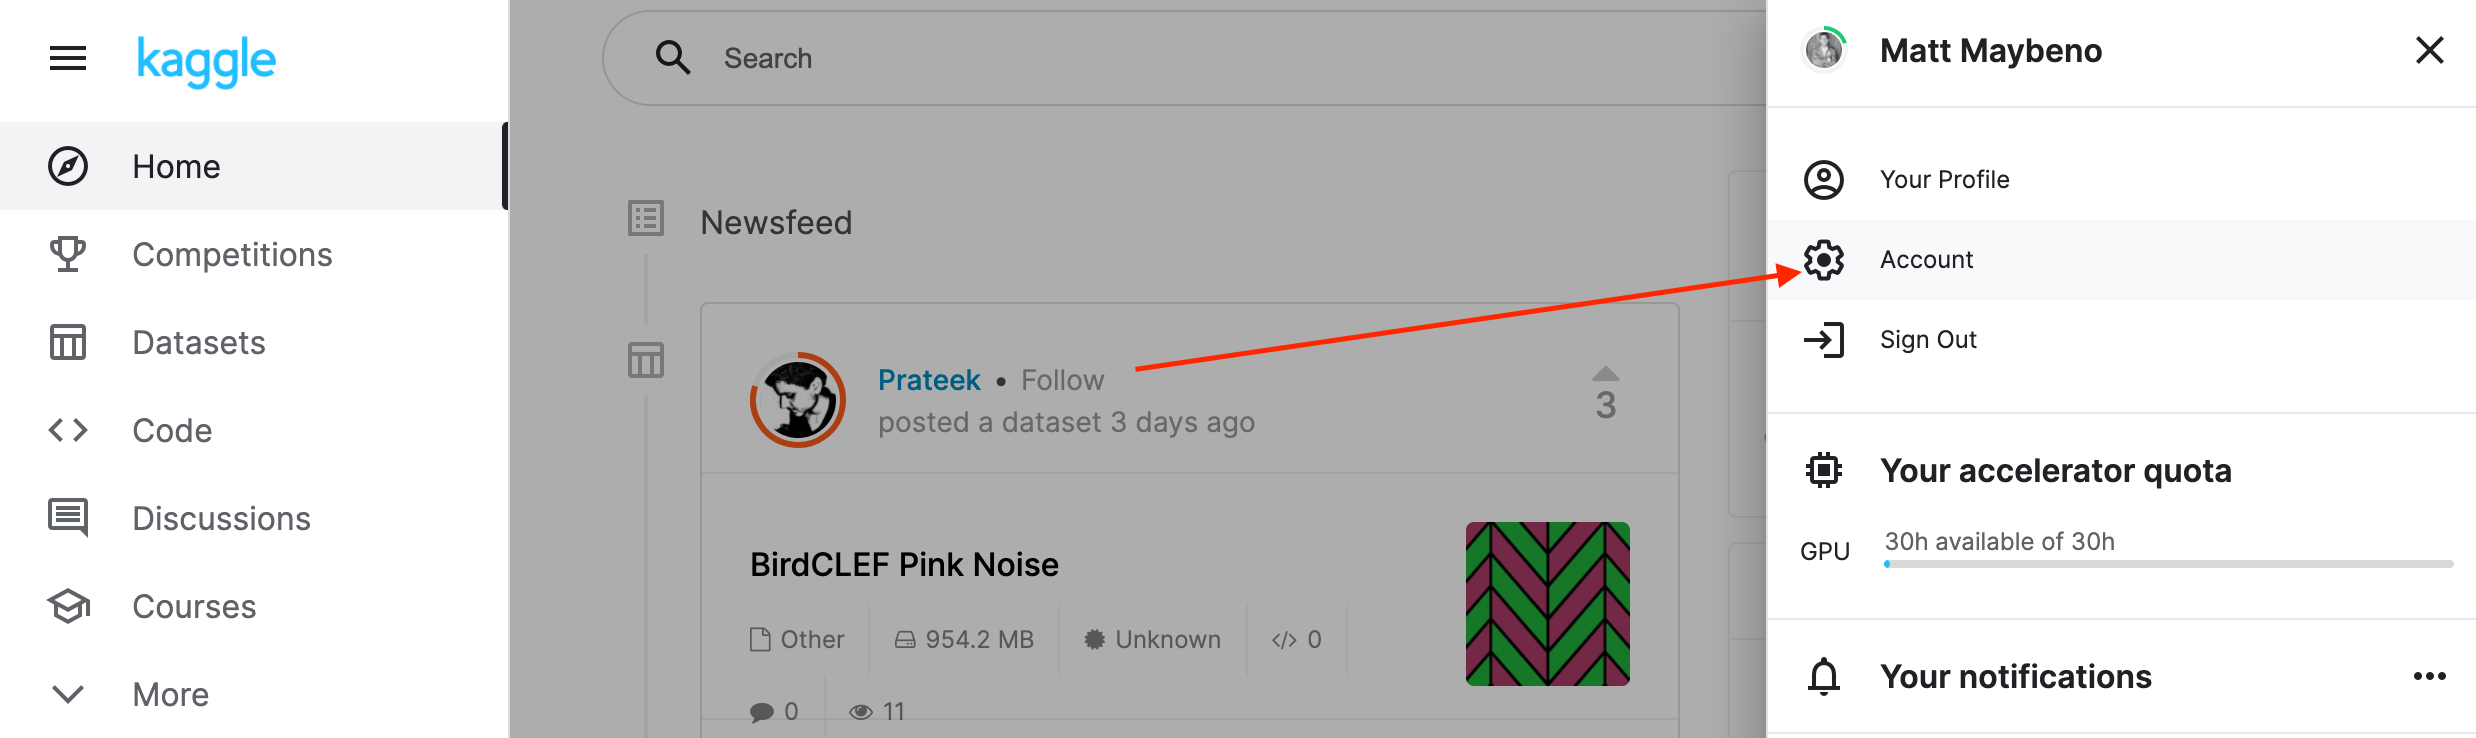
2. Scroll down to API and click Create New API Token.
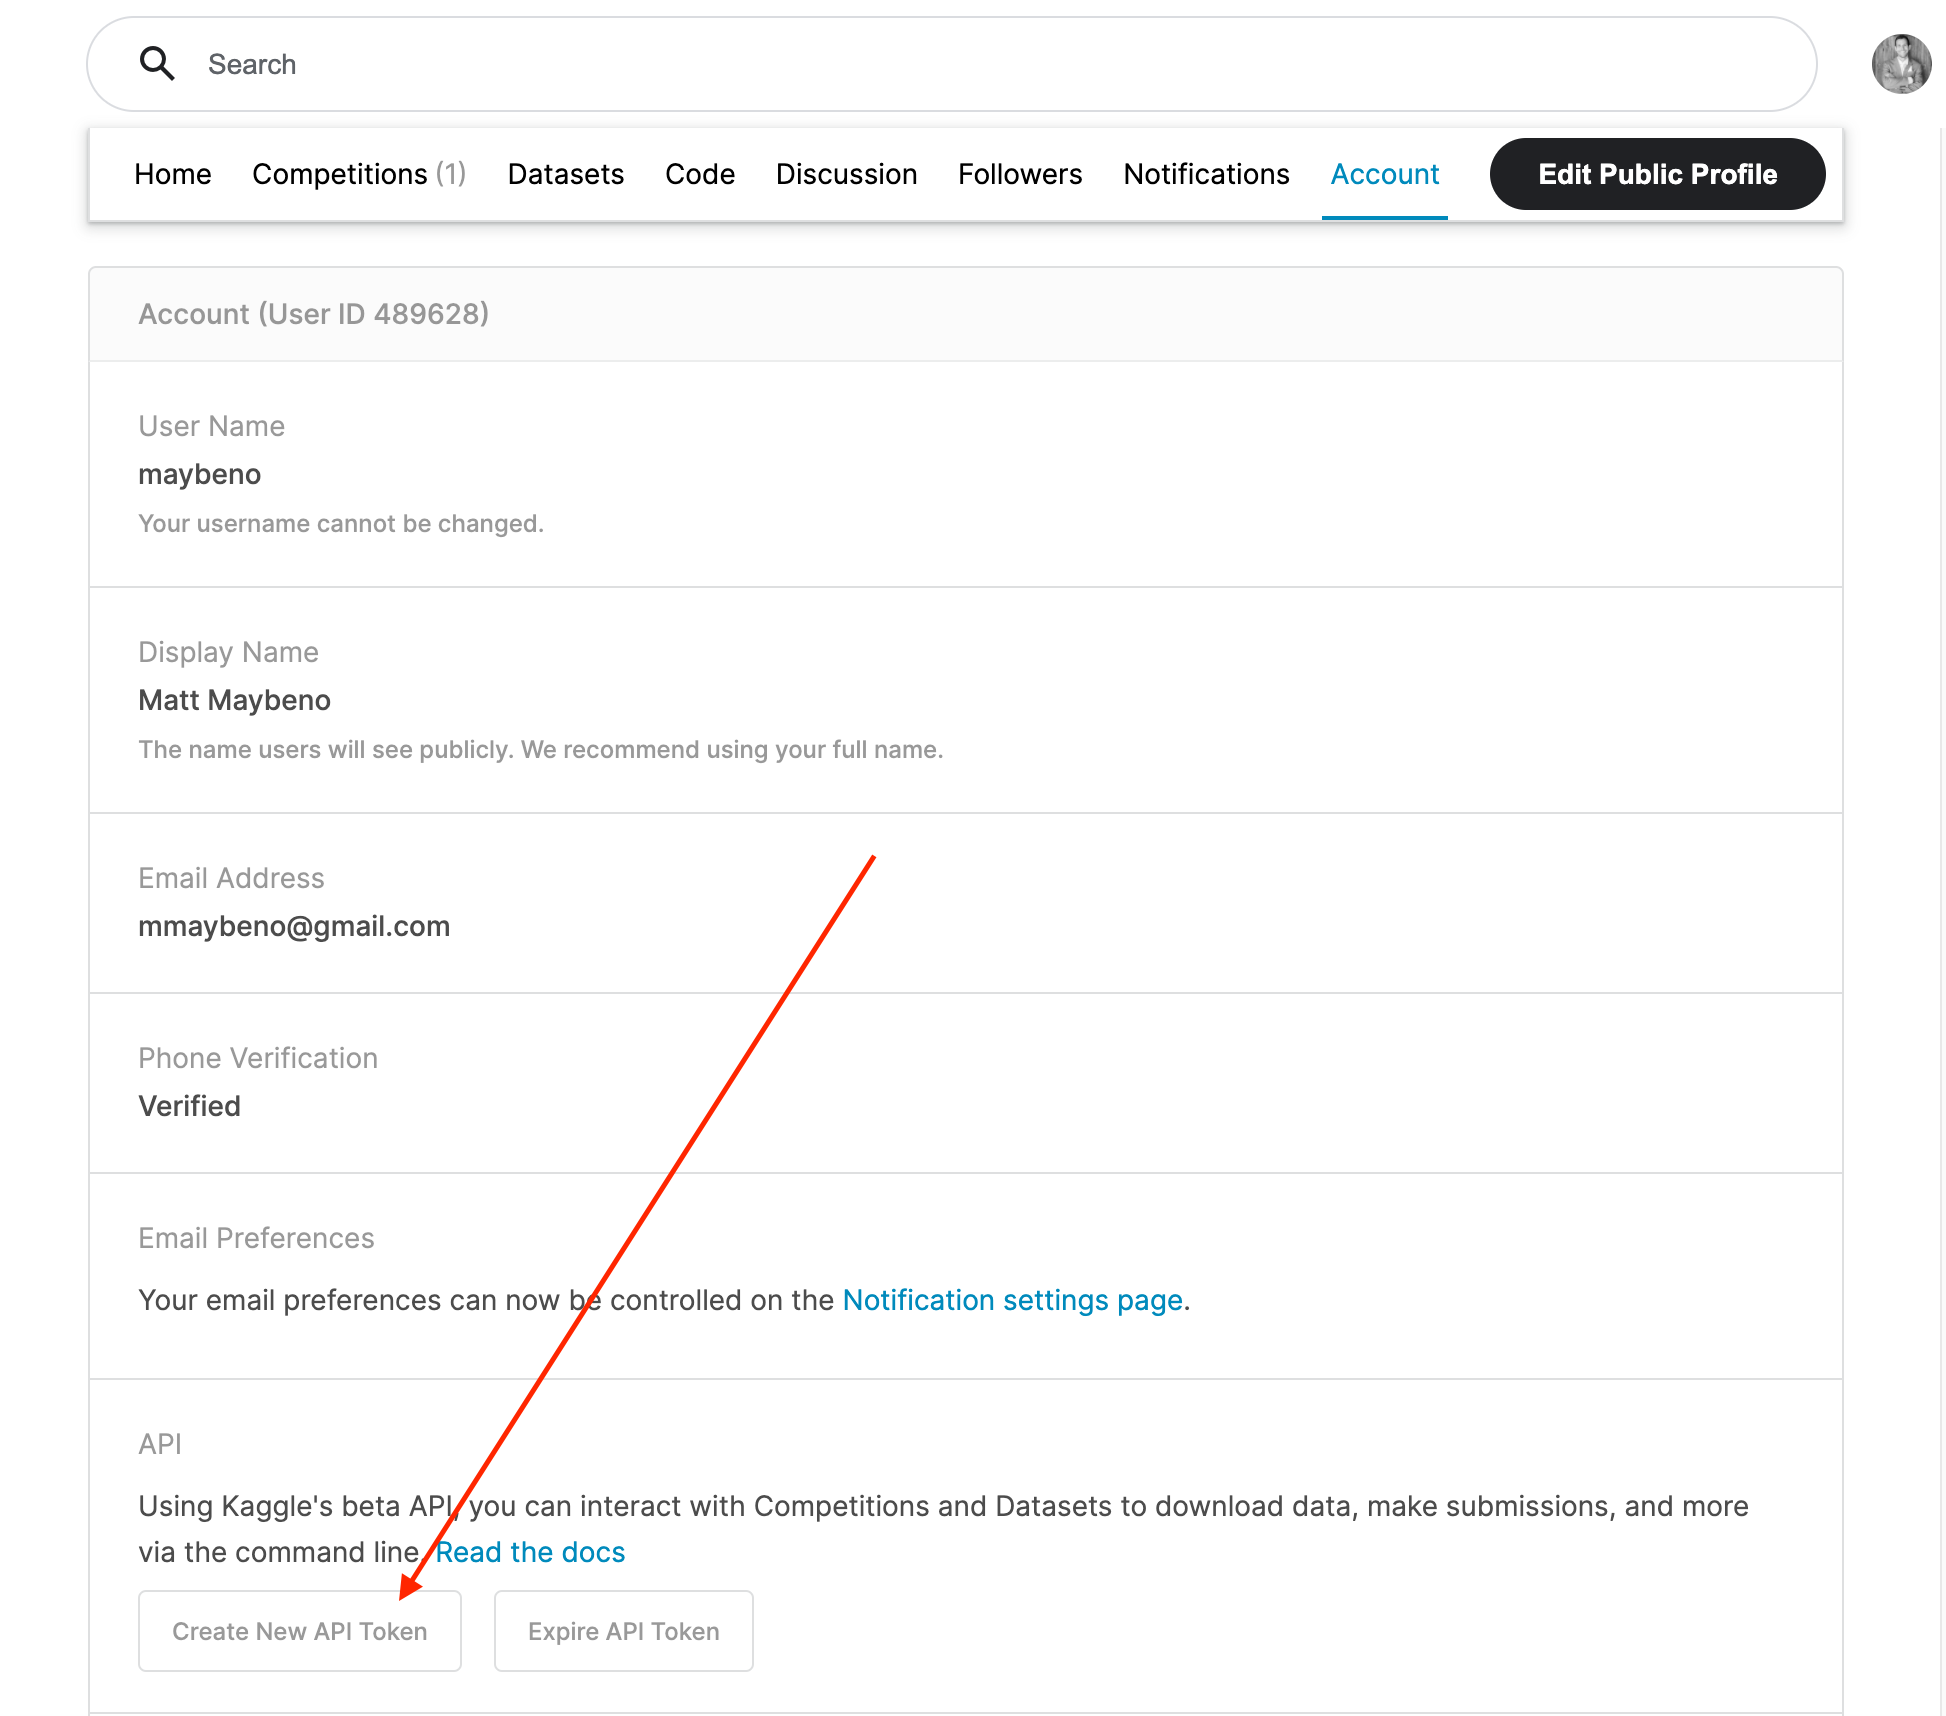
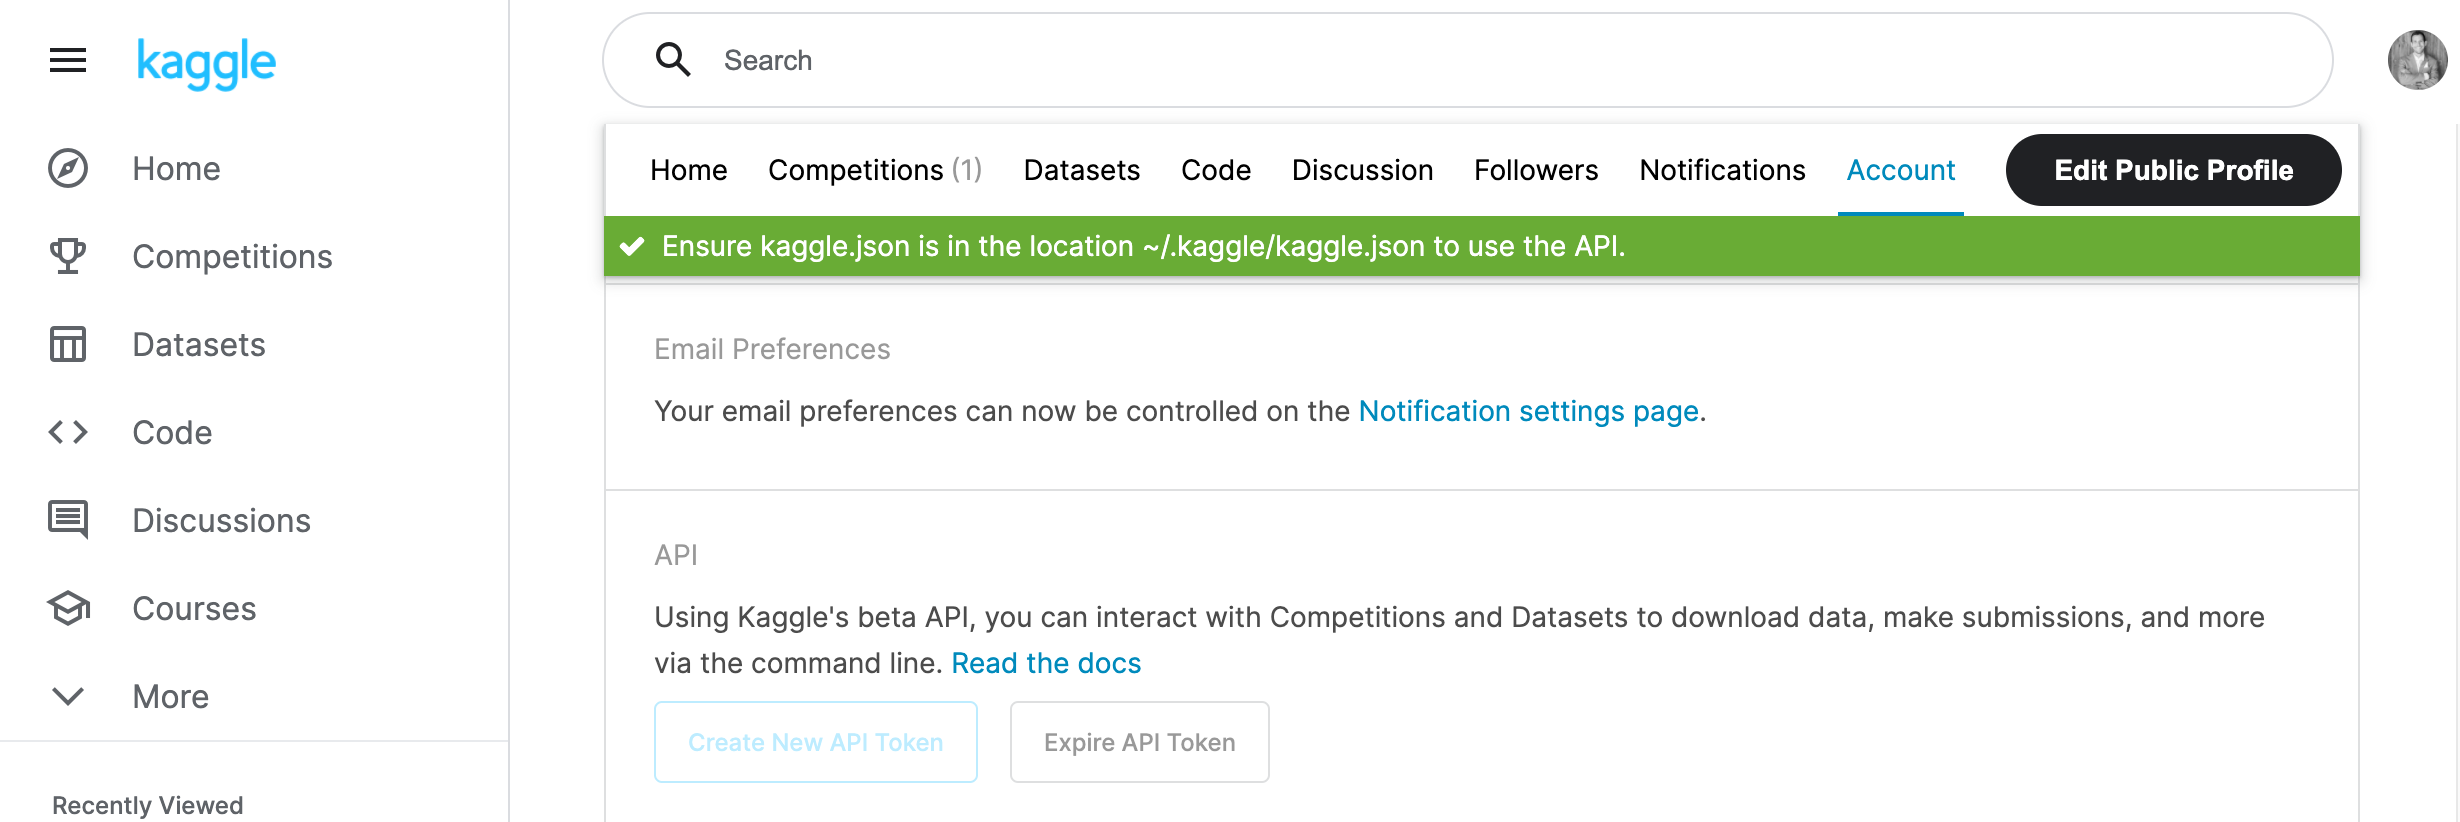
3. Open up `kaggle.json` and use the username and key.
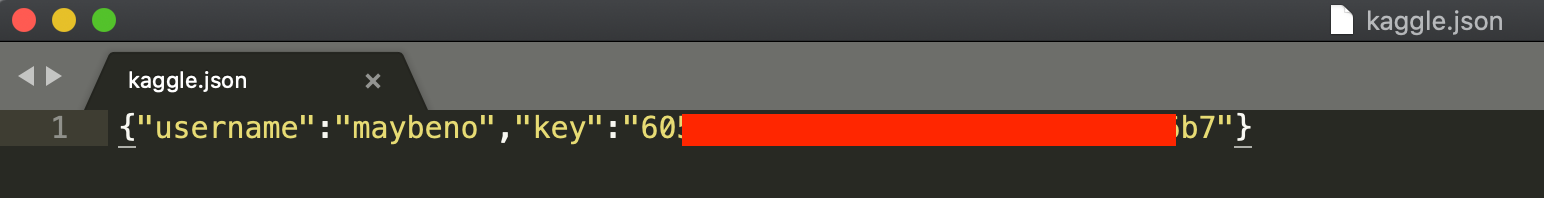

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 26.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 24.4 MB/s eta 0:00:00:00:0100:01
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080016 sha256=e7aa73996470473d07da395f6fedfb24a4b81c1016c9b228d3593045b7ae32f7
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.4.1
    Uninstalling bokeh-3.4.1:
      Successfully uninstalled bokeh-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 1.4.1 requires bokeh<3.5.0,>=3.4.0, but you have bokeh 2.0.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 67.3 MB/s eta 0:00:00
    

### Setup Kaggle API Key

In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "aditikesarwani"
kaggle_key = "dbb2014c59a8efdc8ca55c480f2e2416"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
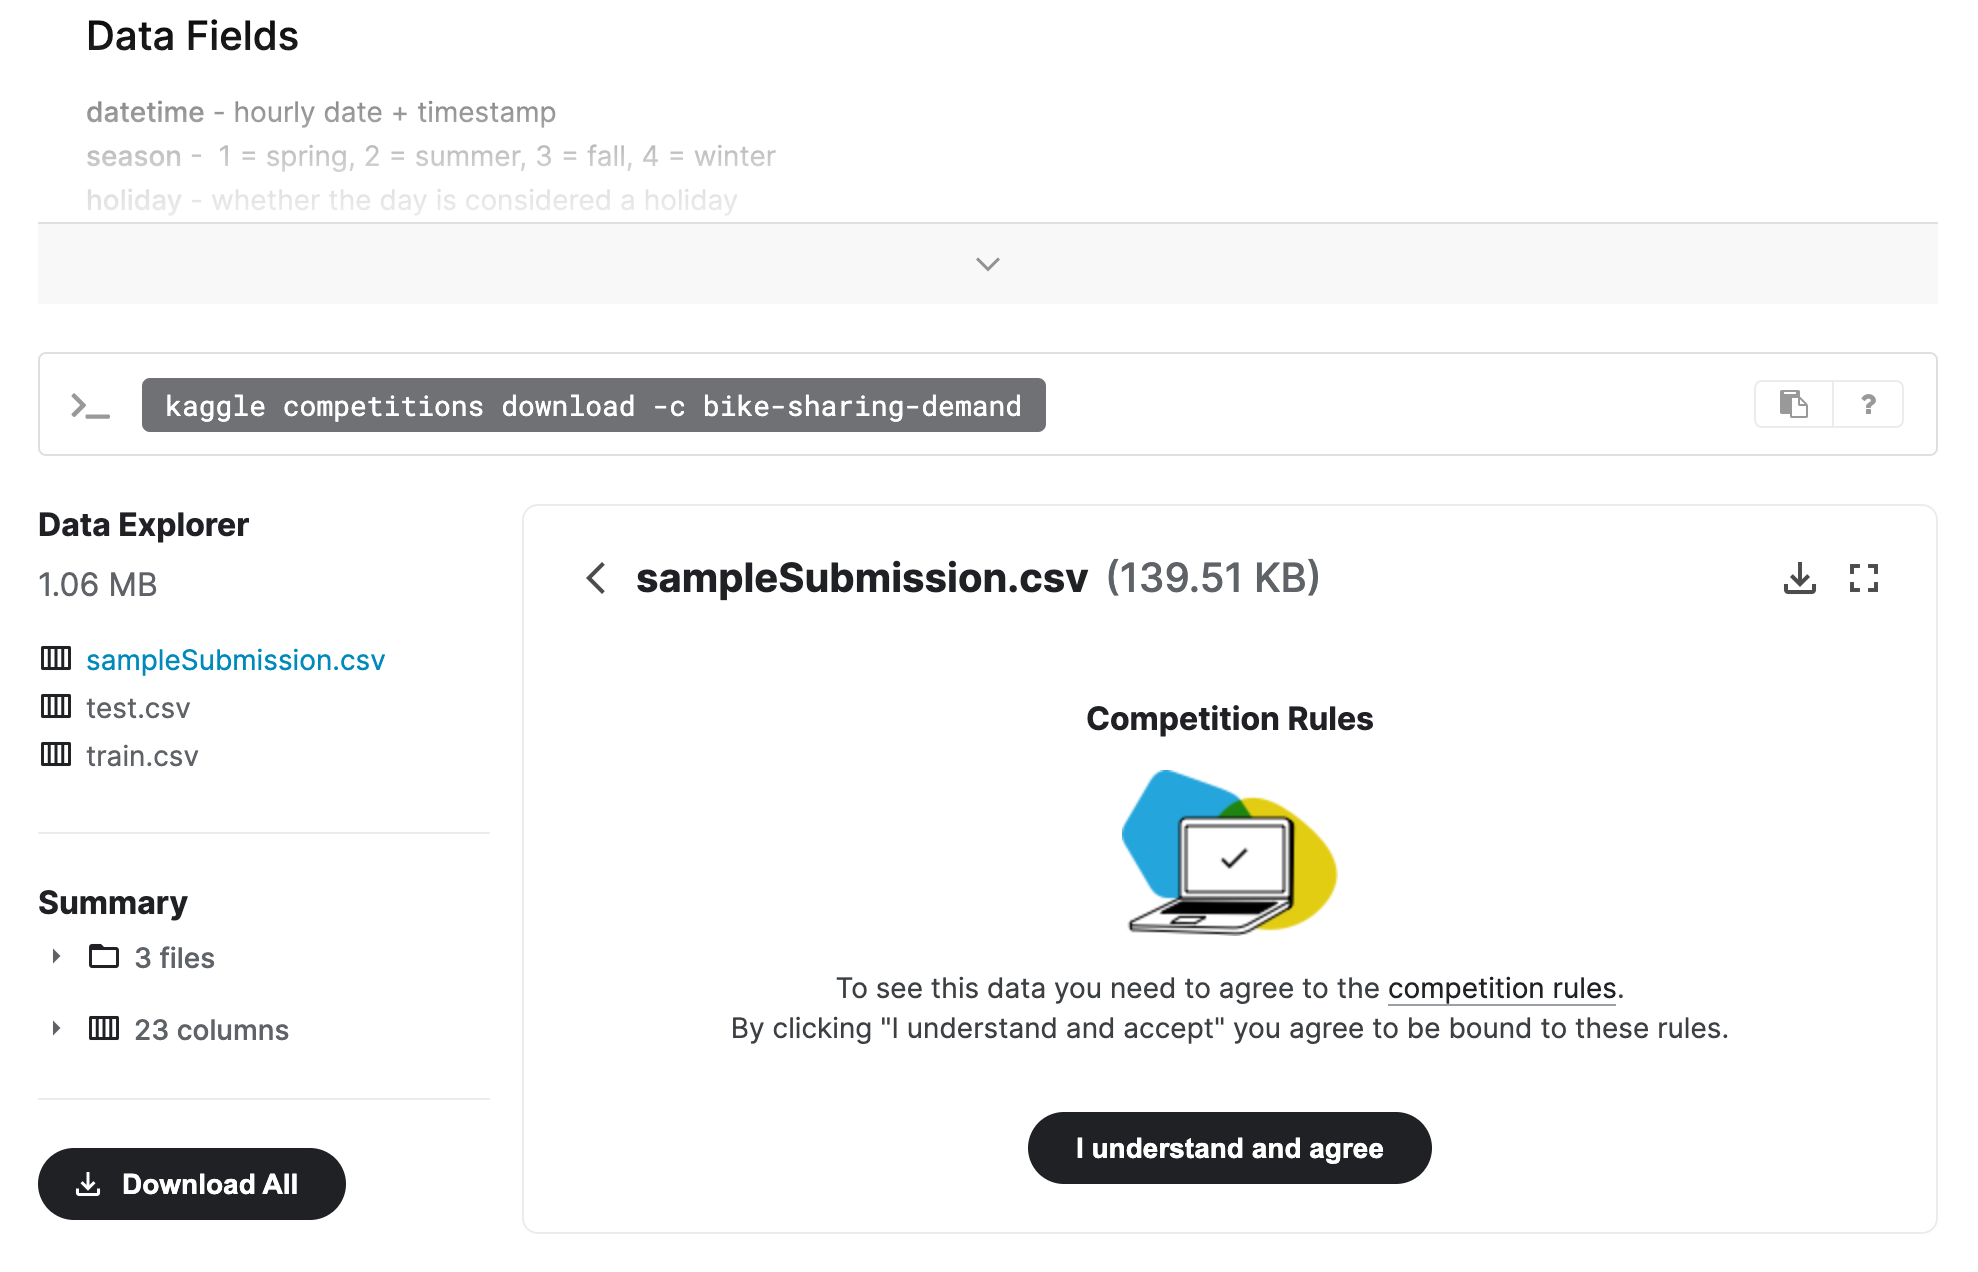

In [11]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!pip install kaggle
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand


  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 5.41MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [12]:
import pandas as pd
from autogluon.tabular import TabularPredictor


In [15]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

train = pd.read_csv('train.csv',parse_dates=['datetime'], date_parser=dateparse)


train.head()

/tmp/ipykernel_59/2892161982.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  train = pd.read_csv('train.csv',parse_dates=['datetime'], date_parser=dateparse)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [17]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [18]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test =pd.read_csv('test.csv', parse_dates=['datetime'], date_parser=dateparse) 
test.head()

/tmp/ipykernel_59/3685360508.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  test =pd.read_csv('test.csv', parse_dates=['datetime'], date_parser=dateparse)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [19]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'], date_parser=dateparse)
submission.head()

/tmp/ipykernel_59/688408350.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  submission = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'], date_parser=dateparse)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [20]:
predictor = TabularPredictor(
    label = "count", 
    eval_metric = "root_mean_squared_error",
    learner_kwargs = {"ignored_columns" : ["casual", "registered"]}
).fit(train_data = train, time_limit = 600, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20240507_185928"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240507_185928/ds_sub_fit/sub_fit_ho.
2024-05-07 18:59:28,982	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.

### Review AutoGluon's training run with ranking of models that did the best.

In [21]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.119097  root_mean_squared_error      20.854572  386.977999                0.000619           0.031549            3       True         12
1   RandomForestMSE_BAG_L2  -53.423817  root_mean_squared_error      16.260164  291.954930                1.058510          41.859608            2       True         11
2          LightGBM_BAG_L2  -55.110768  root_mean_squared_error      15.565326  281.014833                0.363672          30.919511            2       True         10
3        LightGBMXT_BAG_L2  -60.409096  root_mean_squared_error      19.431771  314.167331                4.230117          64.072009            2       True          9
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.076158    0.051121   

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.9582382465295,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'WeightedEnsemble_

### Create predictions from test dataset

In [22]:
predictions = predictor.predict(test)
predictions.head()

0    23.076309
1    42.148125
2    44.991287
3    48.127617
4    51.156223
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [23]:
# Describe the `predictions` series to see if there are any negative values
for x in predictions:
    if(x<0):
        print("negatives present")
        break;

In [ ]:
# How many negative values do we have?
# we have zero negative
# as the  above test dosent came positive.

In [ ]:
# Set them to zero
# no need 
# but can be done by
#predictions[predictions<0]=0

### Set predictions to submission dataframe, save, and submit

In [24]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [25]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 649kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [26]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2024-05-07 19:33:17  first raw submission  complete  1.80524      1.80524       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

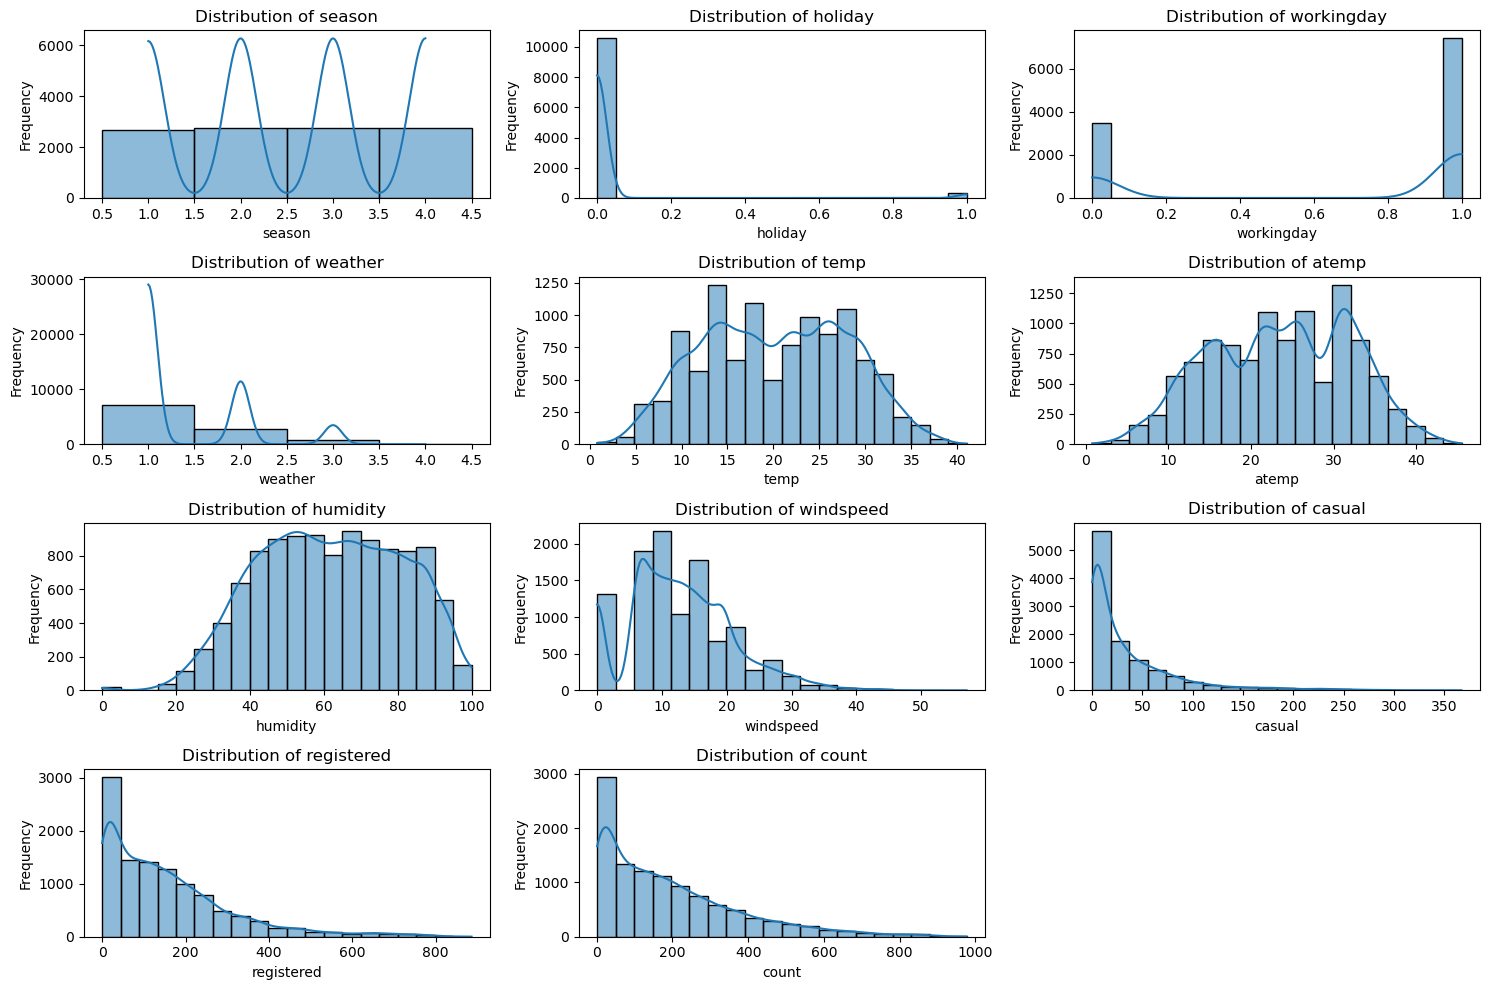

In [49]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
# Get list of all feature columns
feature_columns = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Plot histograms for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(feature_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(train[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [27]:
# Check for missing values
print(train.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [28]:
# Summary statistics of numerical features
print(train.describe())

                            datetime        season       holiday  \
count                          10886  10886.000000  10886.000000   
mean   2011-12-27 05:56:22.399411968      2.506614      0.028569   
min              2011-01-01 00:00:00      1.000000      0.000000   
25%              2011-07-02 07:15:00      2.000000      0.000000   
50%              2012-01-01 20:30:00      3.000000      0.000000   
75%              2012-07-01 12:45:00      4.000000      0.000000   
max              2012-12-19 23:00:00      4.000000      1.000000   
std                              NaN      1.116174      0.166599   

         workingday       weather         temp         atemp      humidity  \
count  10886.000000  10886.000000  10886.00000  10886.000000  10886.000000   
mean       0.680875      1.418427     20.23086     23.655084     61.886460   
min        0.000000      1.000000      0.82000      0.760000      0.000000   
25%        0.000000      1.000000     13.94000     16.665000     47.000000 

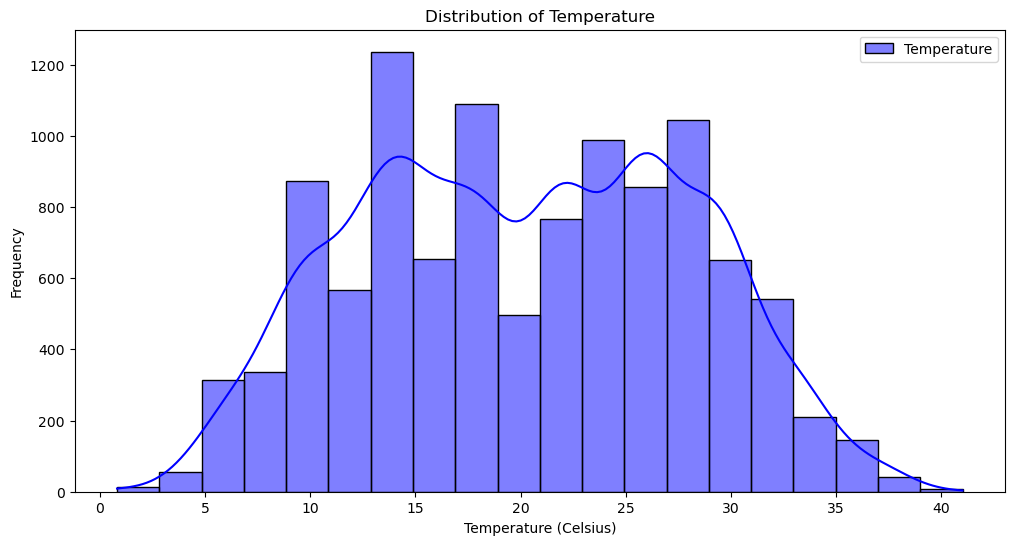

In [34]:
# Visualize the distribution of numerical features
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(train['temp'], bins=20, kde=True, color='blue', label='Temperature')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

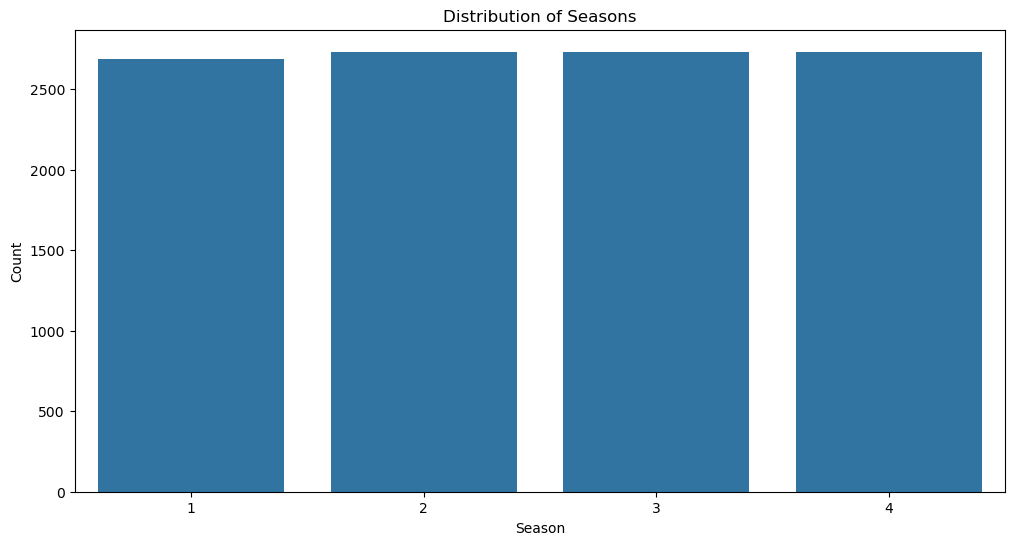

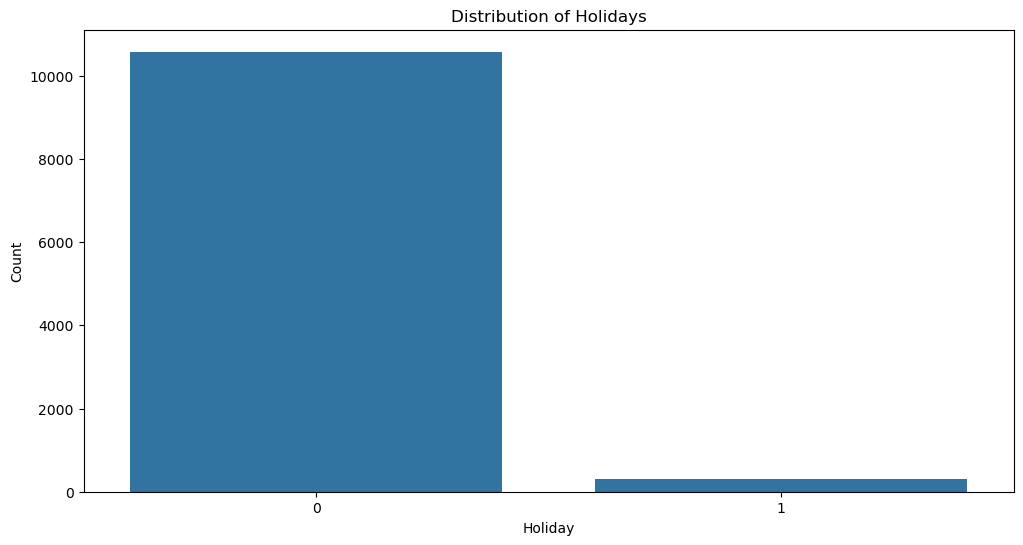

In [35]:
# bike sharin demand dereases during the high tempratures

# Analyze categorical features
plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='season')
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='holiday')
plt.title('Distribution of Holidays')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.show()

# Repeat the countplot visualization for other categorical features


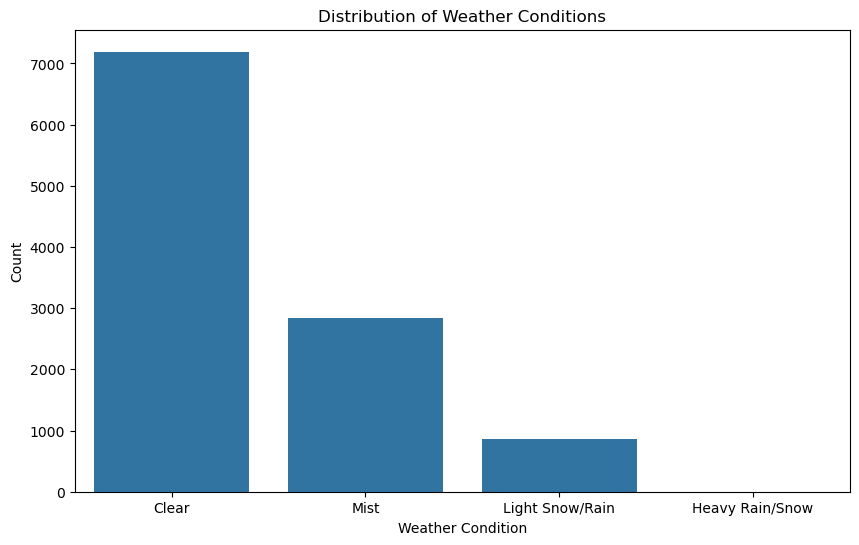

In [40]:
# Visualize the distribution of the 'weather' column
import numpy as np
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='weather')
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(ticks=np.arange(4), labels=['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.show()


In [ ]:
# clear skies calls for more riders 

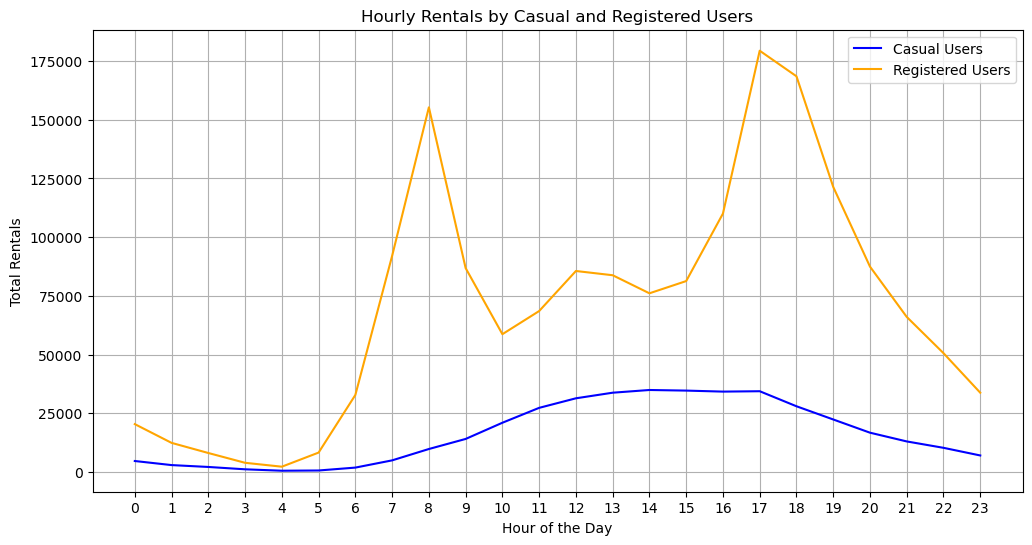

In [43]:
# Convert 'datetime' column to datetime datatype
train['datetime'] = pd.to_datetime(train['datetime'])

# Aggregate rental counts by hour
hourly_rentals = train.groupby(train['datetime'].dt.hour)[['casual', 'registered']].sum()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(hourly_rentals.index, hourly_rentals['casual'], label='Casual Users', color='blue')
plt.plot(hourly_rentals.index, hourly_rentals['registered'], label='Registered Users', color='orange')
plt.title('Hourly Rentals by Casual and Registered Users')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.xticks(np.arange(0, 24))
plt.legend()
plt.grid(True)
plt.show()

In [44]:
#morning times between 6-10am and evening time 4-8 call for most customers

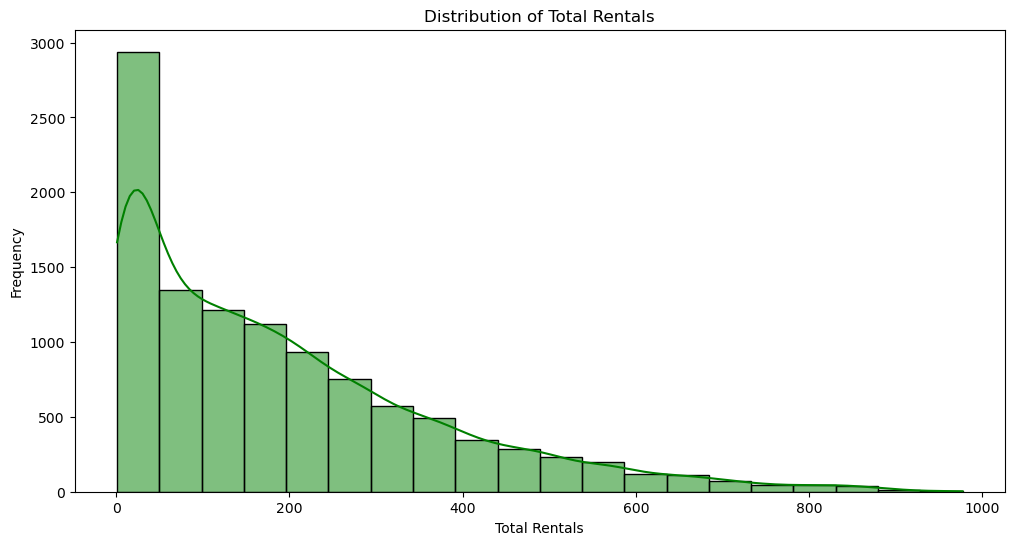

In [37]:
# Analyze the distribution of the target variable
plt.figure(figsize=(12, 6))
sns.histplot(train['count'], bins=20, kde=True, color='green')
plt.title('Distribution of Total Rentals')
plt.xlabel('Total Rentals')
plt.ylabel('Frequency')
plt.show()

In [45]:
# create a new feature
train["hour"] = train.datetime.dt.hour 
test["hour"] = test.datetime.dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [46]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [47]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


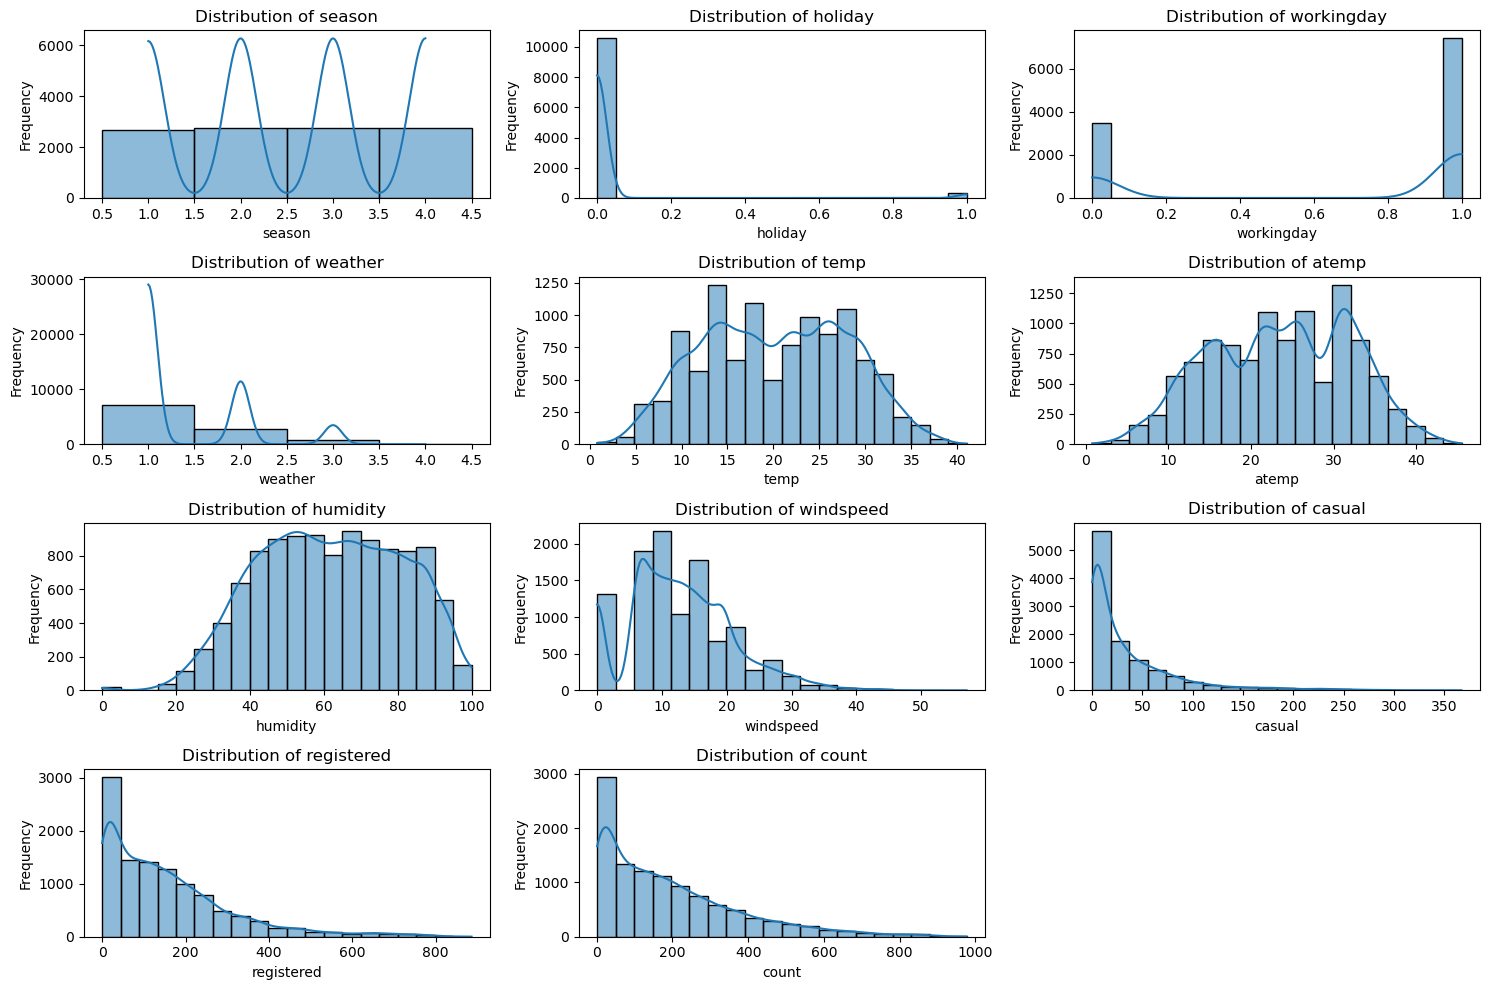

In [50]:
# View histogram of all features again now with the hour feature
feature_columns = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Plot histograms for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(feature_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(train[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [51]:
predictor_new_features = TabularPredictor(
    label = "count", 
    eval_metric = "root_mean_squared_error",
    learner_kwargs = {"ignored_columns" : ["casual", "registered"]}
).fit(train_data = train, time_limit = 600, presets = "best_quality")




No path specified. Models will be saved in: "AutogluonModels/ag-20240507_195912"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240507_195912/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 190 seconds

In [52]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.285208  root_mean_squared_error      26.566365  369.385759                0.000977           0.031386            3       True         12
1          LightGBM_BAG_L2  -30.524176  root_mean_squared_error      24.357855  289.001476                0.354266          32.384945            2       True          9
2        LightGBMXT_BAG_L2  -31.032157  root_mean_squared_error      25.398250  295.189988                1.394661          38.573457            2       True          8
3   RandomForestMSE_BAG_L2  -31.950032  root_mean_squared_error      24.816461  298.395970                0.812872          41.779439            2       True         10
4      WeightedEnsemble_L2  -32.357073  root_mean_squared_error      23.926353  256.585003   

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.457273921492806,
  'LightGBM_BAG_L1': -33.919639163586254,
  'RandomForestMSE_BAG_L1': -38.4543378929385,
  'CatBoost_BAG_L1': -36.605221500601004,
  'WeightedEnsemble_L2': -32.357073405597276,
  'LightGBMXT_BAG_L

In [75]:
prediction_new_features = predictor_new_features.predict(test)

In [76]:
# Remember to set all negative values to zero
prediction_new_features[prediction_new_features<0]=0

In [77]:
# Same submitting predictions Same submitting predictions
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'], date_parser=dateparse)
submission_new_features["count"] = prediction_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

/tmp/ipykernel_59/2967664421.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'], date_parser=dateparse)


In [78]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 615kB/s]
Successfully submitted to Bike Sharing Demand

In [79]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2024-05-07 20:51:01  new features          complete  0.62113      0.62113       
submission_new_features.csv  2024-05-07 20:16:23  new features          complete  0.62113      0.62113       
submission.csv               2024-05-07 19:33:17  first raw submission  complete  1.80524      1.80524       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [70]:
import autogluon as ag

# Define hyperparameters for gradient boosting machine (GBM)
gbm = {
    'num_boost_round': 100,  # Increase number of boosting rounds for more thorough training
    'num_leaves': ag.common.space.Int(lower=20, upper=50, default=30)  # Adjusted range for number of leaves
}

# Combine hyperparameters
hyperparameters = {
    'GBM': gbm,
}

# Hyperparameter tuning configuration
hyperparameter_tune_kwargs = {
    'num_trials': 10,  # Increase number of trials for more thorough search
    'scheduler': 'local',
    'searcher': 'random'  # Using random search for faster exploration of hyperparameter space
}


In [71]:
predictor_new_hpo = TabularPredictor(
    label = "count", 
    eval_metric = "root_mean_squared_error",
    learner_kwargs = {"ignored_columns" : ["casual", "registered"]}
).fit(train_data = train, time_limit = 600, presets = "best_quality",
      hyperparameters=hyperparameters,
      hyperparameter_tune_kwargs = hyperparameter_tune_kwargs)


No path specified. Models will be saved in: "AutogluonModels/ag-20240507_203833"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240507_203833/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 137 seconds

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.63%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.74%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.68%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.64%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.65%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.61%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.59%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFol

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.98%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=1.17%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=1.07%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=1.00%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=1.03%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.96%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-36.0184	 = Validation score   (-root_mean_squared_error)
	29.38s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted mo

In [72]:
predictor_new_hpo.fit_summary()


*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3  -35.690663  root_mean_squared_error       0.008410  373.882886                0.002896           0.039249            3       True         18
1    LightGBM_BAG_L2/T4  -35.826753  root_mean_squared_error       0.004997  286.281755                0.000145          30.301665            2       True         15
2    LightGBM_BAG_L2/T5  -35.939483  root_mean_squared_error       0.005010  285.133393                0.000159          29.153304            2       True         16
3    LightGBM_BAG_L2/T6  -35.952919  root_mean_squared_error       0.004982  285.013107                0.000131          29.033018            2       True         17
4    LightGBM_BAG_L2/T1  -36.018377  root_mean_squared_error       0.005079  285.355650                0.000

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T6': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T7': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T8': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T9': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T10': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T5': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T6': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -41.31

In [80]:
# Remember to set all negative values to zero
prediction_new_hpo = predictor_new_hpo.predict(test)
prediction_new_hpo[prediction_new_hpo<0]=0

In [81]:
# Same submitting predictions
submission_new_hpo =pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'], date_parser=dateparse)
submission_new_hpo["count"] = prediction_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

/tmp/ipykernel_59/3820861376.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  submission_new_hpo =pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'], date_parser=dateparse)


In [82]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 664kB/s]
Successfully submitted to Bike Sharing Demand

In [84]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-05-07 20:51:46  new features with hyperparameters  complete  0.47533      0.47533       
submission_new_features.csv  2024-05-07 20:51:01  new features                       complete  0.62113      0.62113       
submission_new_features.csv  2024-05-07 20:16:23  new features                       complete  0.62113      0.62113       
submission.csv               2024-05-07 19:33:17  first raw submission               complete  1.80524      1.80524       


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

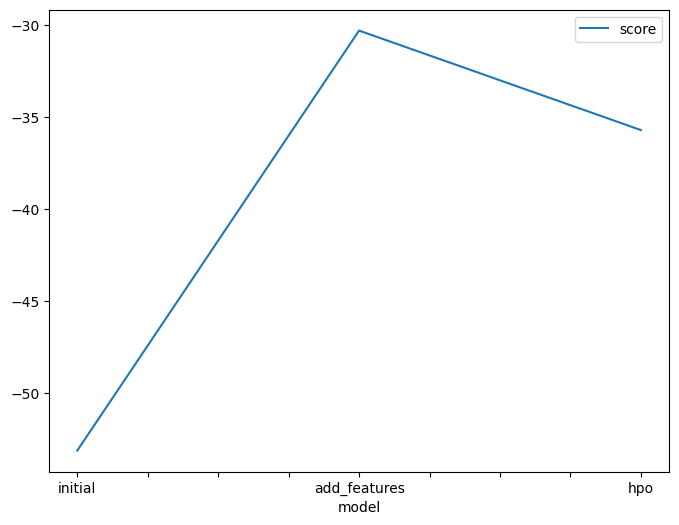

In [90]:
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.119, -30.28, -35.69]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

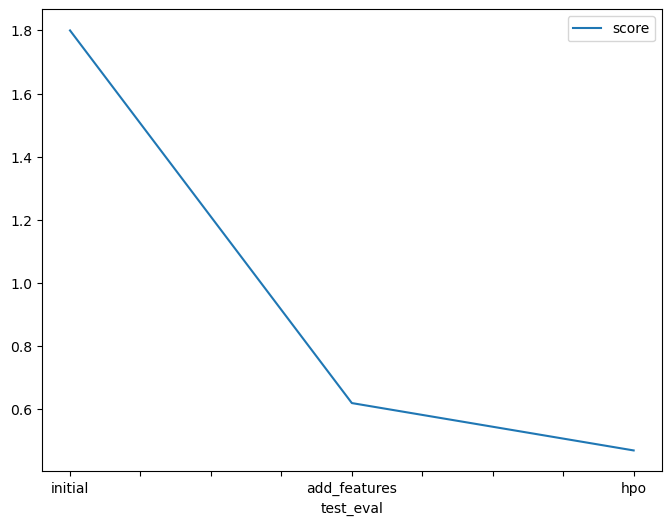

In [91]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80, 0.62, 0.47]
        
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [89]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "time": [600, 600, 600],
    "num_boost_rounds": ["default", "default", 100],
    "num_echos": ["default", "default", 10],
    "score": [1.80, 0.62, 0.47]
})

,model,time,num_boost_rounds,num_echos,score
0,initial,600,default,default,1.80
1,add_features,600,default,default,0.62
2,hpo,600,100,10,0.47
